# Kepler's Equation Solver

### Trevor Dorn-Wallenstein
### Kolby Weisenburger

In [1]:
using PyPlot

#### Let's make the functions to feed into newtons, a function that runs Newton's Method to solve 
#### g(E) = E - e sin(E) - M = 0 

In [2]:
# From time to M
M(t::Float64,t_p::Float64,P::Float64) = (2*pi/P)*(t-t_p)

M (generic function with 1 method)

In [3]:
# this should evaluate to zero when E is correct
g(E::Float64,e,m) = E - e*sin(E) - m

g (generic function with 1 method)

In [5]:
# g'(E)
g_prime(E::Float64,e) = 1.0 - e*cos(E)

g_prime (generic function with 1 method)

In [4]:
#+1 for positive x, -1 for negative, with proper handling of zero division

function sign(x::Float64)
    if x!= 0.0
        return x/abs(x)
    else
        return 0.0
    end
end

sign (generic function with 1 method)

In [6]:
#Best guess at initial E0
E0(m::Float64) = m + 0.85*sign(sin(m))

E0 (generic function with 1 method)

In [7]:
#Newtons takes a function, that function's derivative, a guess at the best value to make the 
#function equal to zero and the parameters to the function. delta can be specified depending
#on your machine's precision.

function newtons(f::Function,f_prime::Function,E_0::Float64,e::Float64,m::Float64;delta=1e-14)
    
    E_new = E_0
    dE = 1.
    
    while abs(dE)>delta
        E_old = E_new
        E_new = E_old - (f(E_old,e,m)/f_prime(E_old,e))
        dE = E_new-E_old
    end
    
    return E_new
    
end

newtons (generic function with 1 method)

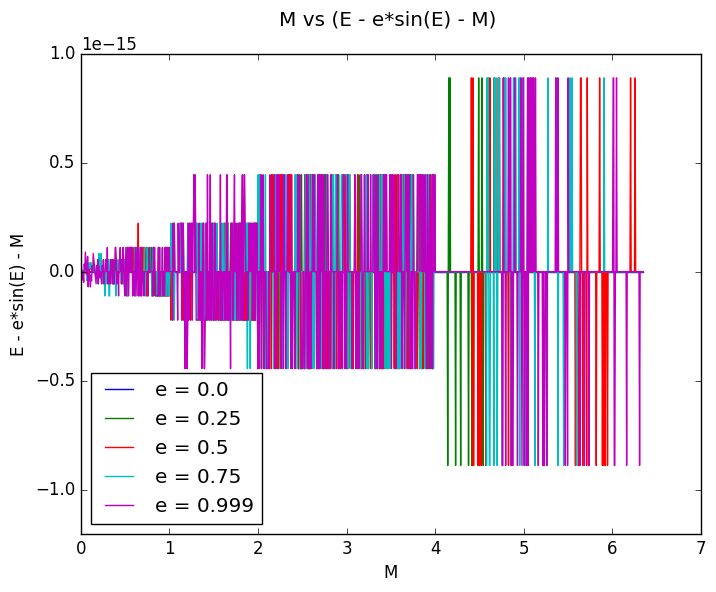

In [8]:
#Now let's just check that our solver is giving us the right answers:

# igure to show the errors from our solver. errors are of order 10^-15 !

fig = figure("M vs M",figsize=(8,6))
title("M vs (E - e*sin(E) - M) \n")
times = linspace(0,1.01,1000)
period = 1.0
sma = 1.0
t_0 = 0.
es = [0.,0.25,0.5,0.75,0.999]
for e in es
    xs = []
    ys = []
    for time in times
        em = M(time,t_0,period)
        E = newtons(g,g_prime,E0(em),e,em)
        dif = g(E, e, em)
        append!(xs,[em])
        append!(ys,[dif])
    end
    plot(xs,ys,label="e = $e")
    ylabel("E - e*sin(E) - M")
    xlabel("M")
    ylim(-1.2e-15,1e-15)
end
legend(loc=0)
show()

##### WHOA That's really small! Excellent! Clearly we are getting the right answer. Now let's convert our results to an actual orbit

In [9]:
#How to convert from E to f
EtoF(E::Float64,e::Float64) = 2.*atan((((1.+e)/(1.-e))^(1./2.))*tan(E/2.))

EtoF (generic function with 1 method)

In [10]:
#How to convert from E to r
EtoR(E::Float64,e::Float64,a::Float64) = a*(1-e*cos(E))

EtoR (generic function with 1 method)

In [11]:
function orbit(e::Float64,sma::Float64,period::Float64;numpoints=1000)
    
    #returns a tuple of two arrays, the radii and f values of the whole orbit (0<=M<2pi)
    #This will let us check to see that the orbits look right
    
    #e is eccentricity
    
    #sma is the smi major axis
    
    #period is what it sounds like\
    
    #numpoints is an optional keyword parameter, which tells it how many points to compute
    #along the orbit. While all the points computed are correct, it looks better when you plot
    #with lots of points.
    
    rs = []
    fs = []
    
    times = linspace(0,period+(1.0/numpoints),numpoints)
    
    for time in times
        em = M(time,0.,period)
        E = newtons(g,g_prime,E0(em),e,em)
        push!(fs,EtoF(E,e))
        push!(rs,EtoR(E,e,sma))
    end
    
    return (rs,fs)
    
end
    

orbit (generic function with 1 method)

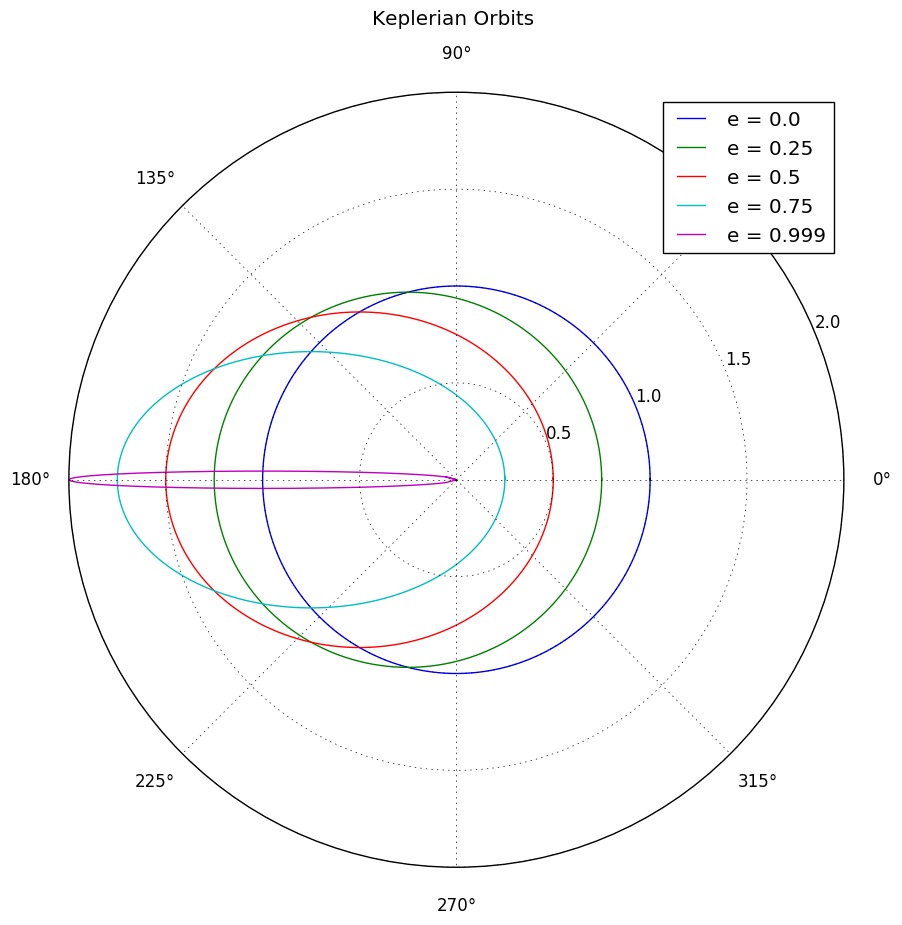

PyObject <matplotlib.legend.Legend object at 0x323802dd0>

In [13]:
fig = figure("orbits",figsize=(10,10))
ax = axes(polar="true")
title("Keplerian Orbits \n")
period = 1.0
sma = 1.0
es = [0.0,0.25,0.5,0.75,0.999]
for e in es
    rs = orbit(e,sma,period)[1]
    fs = orbit(e,sma,period)[2]
    plot(fs,rs,label="e = $e")
end
legend(loc=0)